In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from models import LogisticGrowth, SurfaceLimitedGrowth, VonBertalanffyGrowth, GompertzGrowth, ExponentialGrowth, LinearGrowth, MendelsohnGrowth, MontrollGrowth, ExponentialDecayGrowth, AlleeEffectGrowth, LinearLimitedGrowth
import models as md
import numpy as np
from scipy.integrate import solve_ivp


In [27]:
ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

data = pd.DataFrame({'Tijd (dagen)': ts, 'Tumorvolume (mm³)': Vs})

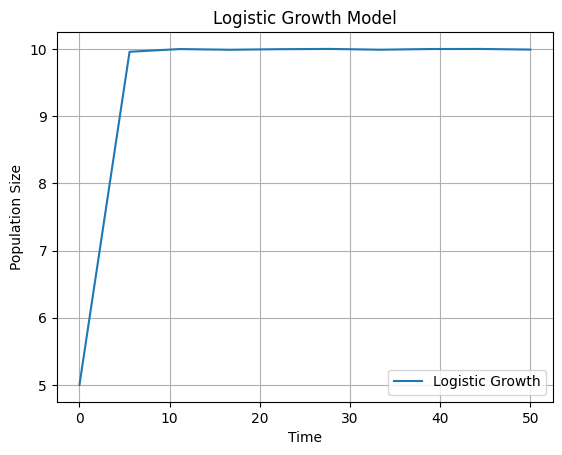

In [28]:

# Maak een instantie van het logistische groeimodel
logistic_model = LogisticGrowth(c=0.1, V=1, Vmax=10)

# Los de ODE op
t_span = (0 , 50)  # tijdspanne van 0 tot 50
V0 = 5  # initiële waarde
t_eval = np.linspace(t_span[0], t_span[1], 10)  # evaluatietijden

t, V = logistic_model.solve_growth(t_span, V0, t_eval=t_eval)

# Plot de resultaten
plt.plot(t, V, label='Logistic Growth')
plt.title('Logistic Growth Model')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
plt.show()


In [29]:
# SurfaceLimitedGrowth
logistic_model = SurfaceLimitedGrowth(c=0.1, V=5, d=0.1)

growth_rate = logistic_model.growth_rate()
print("Logistische groeisnelheid:", growth_rate)

Logistische groeisnelheid: 0.290478022246353


In [30]:
# VonBertalanffyGrowth
logistic_model = VonBertalanffyGrowth(c=0.1, V=5, d=0.1)

growth_rate = logistic_model.growth_rate()
print("Logistische groeisnelheid:", growth_rate)

Logistische groeisnelheid: -0.20759822617871337


In [31]:
# GompertzGrowth
logistic_model = GompertzGrowth(c=0.1, V=5, Vmax=100)

growth_rate = logistic_model.growth_rate()
print("Logistische groeisnelheid:", growth_rate)

Logistische groeisnelheid: 1.4978661367769954


In [32]:
# eigen gemaakt van internet

In [33]:
# eigen gemaakt van internet

In [34]:
# eigen gemaakt van internet

In [35]:
# eigen gemaakt van internet